In [1]:
#import libraries 
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')
data = pd.read_csv("C://Users//dell//Downloads/loan/loan.csv")

In [2]:
data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


## Checking the missing values percetange columns wise

In [3]:
data.isnull().mean()*100

id                              0.000000
member_id                       0.000000
loan_amnt                       0.000000
funded_amnt                     0.000000
funded_amnt_inv                 0.000000
                                 ...    
tax_liens                       0.098195
tot_hi_cred_lim               100.000000
total_bal_ex_mort             100.000000
total_bc_limit                100.000000
total_il_high_credit_limit    100.000000
Length: 111, dtype: float64

## Theare several columns having more than 50% of null values; Let's drop the columns having 60% or more null values

In [5]:
for value in data[data.columns[data.isnull().mean() > 0.60]]:
    data = data.drop(value, axis=1)

## Chekcing the values having null values more than 0% in columns

In [6]:
for value in data[data.columns[data.isnull().mean() > 0.00]]:
    print(value)

emp_title
emp_length
desc
title
revol_util
last_pymnt_d
last_credit_pull_d
collections_12_mths_ex_med
chargeoff_within_12_mths
pub_rec_bankruptcies
tax_liens


In [7]:
data.shape

(39717, 54)

## There are several columns which doesn't contribute much in the analysis hence it will be fine to remove such columns. 
- There are columns like Id, member_id, emp_title, title and desc which won't contribute much in the analysis. So it will good to remove these colums

In [8]:
data = data.drop(['id', 'member_id','emp_title', 'title', 'desc'], axis=1)

## Let's check other columns and their content
- So basically here we are checking if columns are having single values or different values

In [9]:
data.nunique().sort_values()

tax_liens                         1
delinq_amnt                       1
chargeoff_within_12_mths          1
acc_now_delinq                    1
application_type                  1
policy_code                       1
collections_12_mths_ex_med        1
initial_list_status               1
pymnt_plan                        1
term                              2
pub_rec_bankruptcies              3
verification_status               3
loan_status                       3
pub_rec                           5
home_ownership                    5
grade                             7
inq_last_6mths                    9
delinq_2yrs                      11
emp_length                       11
purpose                          14
sub_grade                        35
open_acc                         40
addr_state                       50
issue_d                          55
total_acc                        82
last_pymnt_d                    101
last_credit_pull_d              106
int_rate                    

### From above we can see there are many columns having single value which doesn't contribute much in the analysis. So will drop such columns

In [10]:
data = data.drop(['tax_liens','delinq_amnt','acc_now_delinq','application_type','policy_code', 'initial_list_status', 'pymnt_plan', 'chargeoff_within_12_mths', 'collections_12_mths_ex_med'], axis=1)

In [11]:
data.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
addr_state                    50
issue_d                       55
total_acc                     82
last_pymnt_d                 101
last_credit_pull_d           106
int_rate                     371
earliest_cr_line             526
zip_code                     823
loan_amnt                    885
funded_amnt                 1041
revol_util                  1089
out_prncp                   1137
out_prncp_inv               1138
total_rec_late_fee          1356
collection_recovery_fee     2616
dti                         2868
recoveries                  4040
annual_inc

### Let check further columns 

In [12]:
data.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,...,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,pub_rec_bankruptcies
0,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,...,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,May-16,0.0
1,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,...,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,Sep-13,0.0
2,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,...,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,May-16,0.0
3,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,...,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,Apr-16,0.0
4,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,...,3513.33,2475.94,1037.39,0.00,0.00,0.00,May-16,67.79,May-16,0.0


In [13]:
data.shape

(39717, 40)

### There are a few more columns which doesn't contribute in analysis so let's remove them too.

- loan_amnt column is already present hence  we won't need 'funded_amnt' column as it's having the same value as loan_amnt column
- 'url', 'zip', 'addr_state' column is not going to add any value in the analysis hence we will remove it.
- 'last_credit_pull_d' column is contains dates hence we don't need this column.
- The below columns will not add any value to the analysis.
- 'out_prncp', 'out_prncp_inv', 'total_pymnt','total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries'


In [14]:
data = data.drop(['funded_amnt', 'url', 'zip_code', 'last_credit_pull_d', 'addr_state', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int','total_rec_late_fee', 'recoveries'], axis=1)

In [15]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,pub_rec_bankruptcies
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,1,3,0,13648,83.70%,9,0.00,Jan-15,171.62,0.0
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,5,3,0,1687,9.40%,4,1.11,Apr-13,119.66,0.0
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,2,2,0,2956,98.50%,10,0.00,Jun-14,649.91,0.0
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,1,10,0,5598,21%,37,0.00,Jan-15,357.48,0.0
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,0,15,0,27783,53.90%,38,0.00,May-16,67.79,0.0


In [16]:
data.nunique().sort_values()

term                           2
pub_rec_bankruptcies           3
loan_status                    3
verification_status            3
pub_rec                        5
home_ownership                 5
grade                          7
inq_last_6mths                 9
delinq_2yrs                   11
emp_length                    11
purpose                       14
sub_grade                     35
open_acc                      40
issue_d                       55
total_acc                     82
last_pymnt_d                 101
int_rate                     371
earliest_cr_line             526
loan_amnt                    885
revol_util                  1089
collection_recovery_fee     2616
dti                         2868
annual_inc                  5318
funded_amnt_inv             8205
installment                15383
revol_bal                  21711
last_pymnt_amnt            34930
dtype: int64

### The below columns won't contribute much in determining if a customer can default or not
- 'collection_recovery_fee'
- 'last_pymnt_d', 
- 'last_pymnt_amnt'
- 'pub_rec_bankruptcies', 
- 'revol_bal'


In [17]:
data = data.drop([ 'collection_recovery_fee','last_pymnt_d', 'last_pymnt_amnt', 'pub_rec_bankruptcies', 'revol_bal'], axis=1)

In [18]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc',
       'pub_rec', 'revol_util', 'total_acc'],
      dtype='object')

In [19]:
data.shape

(39717, 22)

In [20]:
data = data.drop('delinq_2yrs', axis=1)

In [21]:
data.shape

(39717, 21)

In [22]:
data.columns

Index(['loan_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment',
       'grade', 'sub_grade', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'purpose', 'dti',
       'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec',
       'revol_util', 'total_acc'],
      dtype='object')

In [23]:
 data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
4,3000,3000.0,60 months,12.69%,67.79,B,B5,1 year,RENT,80000.0,...,Dec-11,Current,other,17.94,Jan-96,0,15,0,53.90%,38


### Our aim here to find the people who can default hence we can limit the data. Customer who have have already availed the loan and still their EMIs are in progress. 
- Let' exclude the customer whose loan status is "Current"

In [24]:
data = data[data.loan_status != "Current"]

In [25]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65%,162.87,B,B2,10+ years,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.70%,9
1,2500,2500.0,60 months,15.27%,59.83,C,C4,< 1 year,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.40%,4
2,2400,2400.0,36 months,15.96%,84.33,C,C5,10+ years,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.50%,10
3,10000,10000.0,36 months,13.49%,339.31,C,C1,10+ years,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21%,37
5,5000,5000.0,36 months,7.90%,156.46,A,A4,3 years,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.30%,12


In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           37544 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

### Now we have to check the missing values and fill those values

In [27]:
data.isnull().mean()*100

loan_amnt              0.000000
funded_amnt_inv        0.000000
term                   0.000000
int_rate               0.000000
installment            0.000000
grade                  0.000000
sub_grade              0.000000
emp_length             2.677761
home_ownership         0.000000
annual_inc             0.000000
verification_status    0.000000
issue_d                0.000000
loan_status            0.000000
purpose                0.000000
dti                    0.000000
earliest_cr_line       0.000000
inq_last_6mths         0.000000
open_acc               0.000000
pub_rec                0.000000
revol_util             0.129611
total_acc              0.000000
dtype: float64

### From above we can see  that 'revol_util', 'emp_length' columns  are having some null values. 
- Let's fill the null values.

In [28]:
data[['revol_util', 'emp_length']]

,revol_util,emp_length
0,83.70%,10+ years
1,9.40%,< 1 year
2,98.50%,10+ years
3,21%,10+ years
5,28.30%,3 years
...,...,...
39712,13.10%,4 years
39713,26.90%,3 years
39714,19.40%,< 1 year
39715,0.70%,< 1 year


In [29]:
#Let's  remove the % symbolfrom revol_util colum
data['revol_util']= data['revol_util'].apply(lambda x: float(str(x).replace('%','')) )


## As 'revol_util' column contains float values so we can take the median and fill the missing values

In [30]:
med = data['revol_util'].median()
data['revol_util']= data['revol_util'].fillna(med)

In [58]:
data.isnull().mean()*100

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

## Let's fill the emp_length column's missing values.

In [32]:
mode = data['emp_length'].mode()[0]
data['emp_length'] = data['emp_length'].fillna(mode)

In [33]:
data.isnull().mean()*100

loan_amnt              0.0
funded_amnt_inv        0.0
term                   0.0
int_rate               0.0
installment            0.0
grade                  0.0
sub_grade              0.0
emp_length             0.0
home_ownership         0.0
annual_inc             0.0
verification_status    0.0
issue_d                0.0
loan_status            0.0
purpose                0.0
dti                    0.0
earliest_cr_line       0.0
inq_last_6mths         0.0
open_acc               0.0
pub_rec                0.0
revol_util             0.0
total_acc              0.0
dtype: float64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   loan_amnt            38577 non-null  int64  
 1   funded_amnt_inv      38577 non-null  float64
 2   term                 38577 non-null  object 
 3   int_rate             38577 non-null  object 
 4   installment          38577 non-null  float64
 5   grade                38577 non-null  object 
 6   sub_grade            38577 non-null  object 
 7   emp_length           38577 non-null  object 
 8   home_ownership       38577 non-null  object 
 9   annual_inc           38577 non-null  float64
 10  verification_status  38577 non-null  object 
 11  issue_d              38577 non-null  object 
 12  loan_status          38577 non-null  object 
 13  purpose              38577 non-null  object 
 14  dti                  38577 non-null  float64
 15  earliest_cr_line     38577 non-null 

### Let see the data types of objects and correct them

In [40]:
data[['term', 'int_rate', 'emp_length']]

,term,int_rate,emp_length
0,36 months,10.65%,10+ years
1,60 months,15.27%,< 1 year
2,36 months,15.96%,10+ years
3,36 months,13.49%,10+ years
5,36 months,7.90%,3 years
...,...,...,...
39712,36 months,8.07%,4 years
39713,36 months,10.28%,3 years
39714,36 months,8.07%,< 1 year
39715,36 months,7.43%,< 1 year


In [75]:
data['emp_length'] = data['emp_length'].apply(lambda x: 0 if '<' in x else x[0:2] )

TypeError: argument of type 'int' is not iterable

In [54]:
data['int_rate'] = data['int_rate'].apply(lambda x: float(str(x).replace('%','')) )

In [55]:
data.head()

,loan_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_length,home_ownership,annual_inc,...,issue_d,loan_status,purpose,dti,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_util,total_acc
0,5000,4975.0,36 months,10.65,162.87,B,B2,10,RENT,24000.0,...,Dec-11,Fully Paid,credit_card,27.65,Jan-85,1,3,0,83.7,9
1,2500,2500.0,60 months,15.27,59.83,C,C4,0,RENT,30000.0,...,Dec-11,Charged Off,car,1.00,Apr-99,5,3,0,9.4,4
2,2400,2400.0,36 months,15.96,84.33,C,C5,10,RENT,12252.0,...,Dec-11,Fully Paid,small_business,8.72,Nov-01,2,2,0,98.5,10
3,10000,10000.0,36 months,13.49,339.31,C,C1,10,RENT,49200.0,...,Dec-11,Fully Paid,other,20.00,Feb-96,1,10,0,21.0,37
5,5000,5000.0,36 months,7.90,156.46,A,A4,3,RENT,36000.0,...,Dec-11,Fully Paid,wedding,11.20,Nov-04,3,9,0,28.3,12


### Let's createe categorical, continous variables

In [59]:
cat_vars = data[['term', 'grade', 'sub_grade', 'home_ownership', 'loan_status','purpose']]
cont_vars = data[['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc',
                 'dti','inq_last_6mths','open_acc', 'pub_rec', 'revol_util', 'total_acc' ]]
other_vars = data[['issue_d', 'earliest_cr_line']]

In [64]:
data[['loan_amnt', 'funded_amnt_inv', 'int_rate', 'installment', 'emp_length', 'annual_inc',
                 'dti','inq_last_6mths','open_acc', 'pub_rec', 'revol_util', 'total_acc' ]].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38577 entries, 0 to 39716
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   loan_amnt        38577 non-null  int64  
 1   funded_amnt_inv  38577 non-null  float64
 2   int_rate         38577 non-null  float64
 3   installment      38577 non-null  float64
 4   emp_length       38577 non-null  object 
 5   annual_inc       38577 non-null  float64
 6   dti              38577 non-null  float64
 7   inq_last_6mths   38577 non-null  int64  
 8   open_acc         38577 non-null  int64  
 9   pub_rec          38577 non-null  int64  
 10  revol_util       38577 non-null  float64
 11  total_acc        38577 non-null  int64  
dtypes: float64(6), int64(5), object(1)
memory usage: 3.8+ MB


In [77]:
data['emp_length']= pd.to_numeric(data['emp_length'])

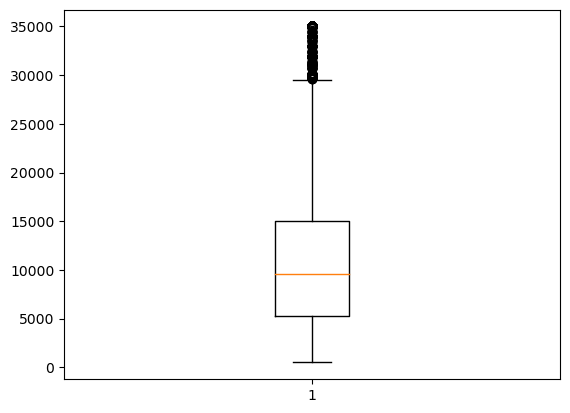

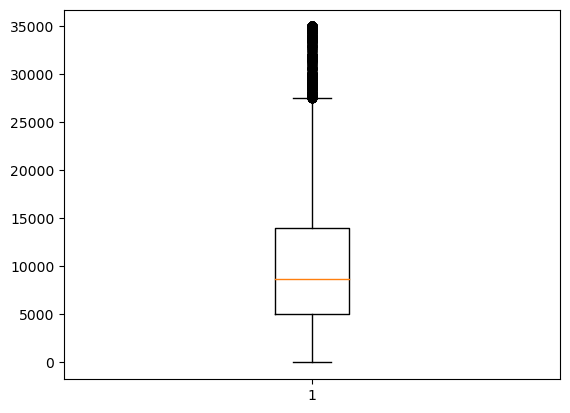

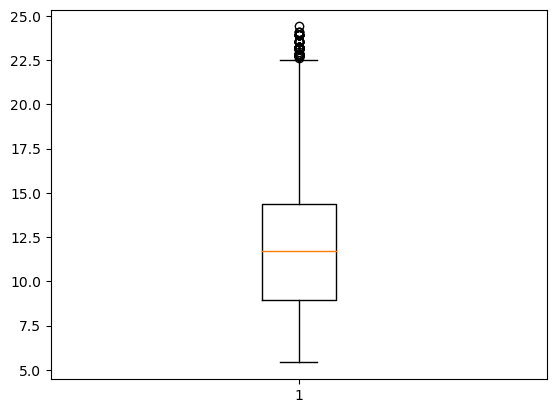

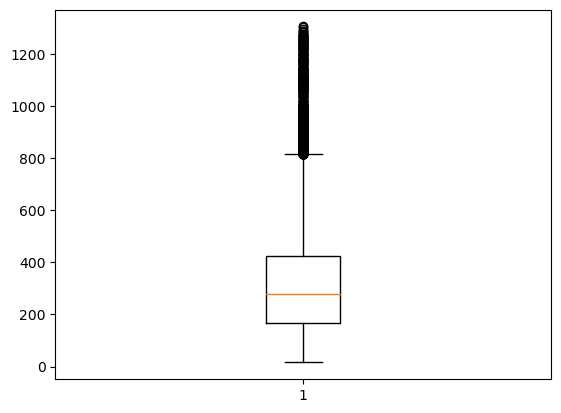

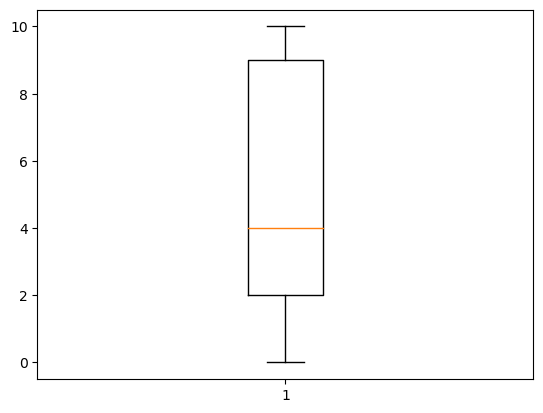

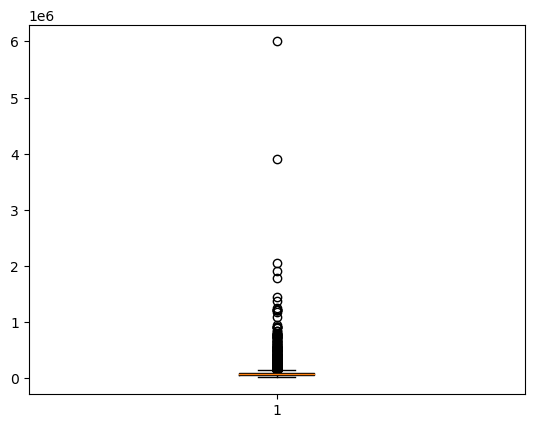

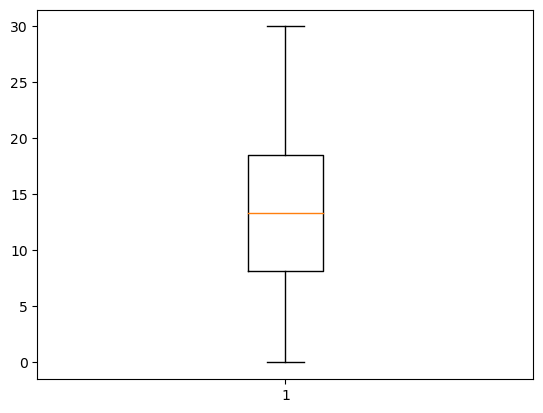

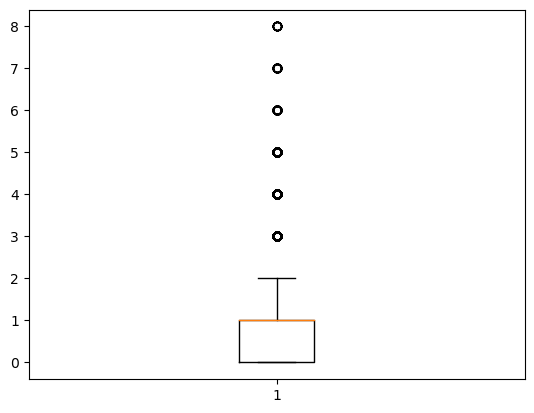

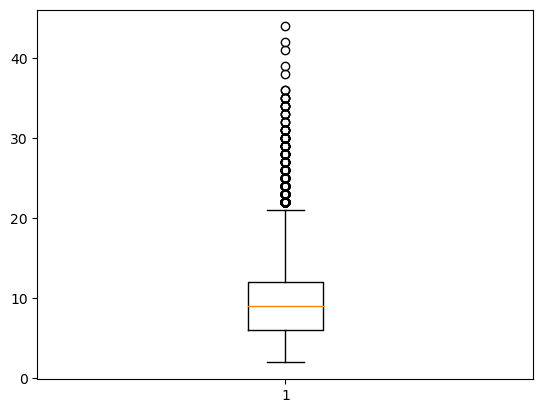

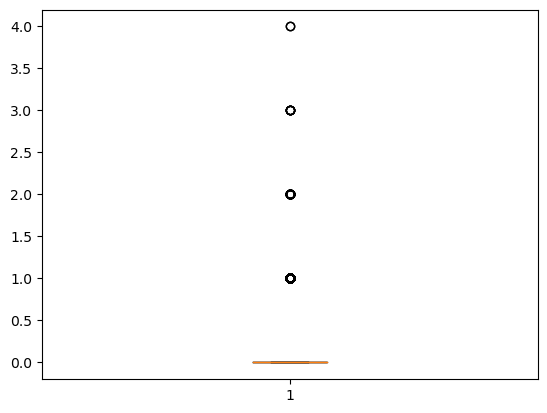

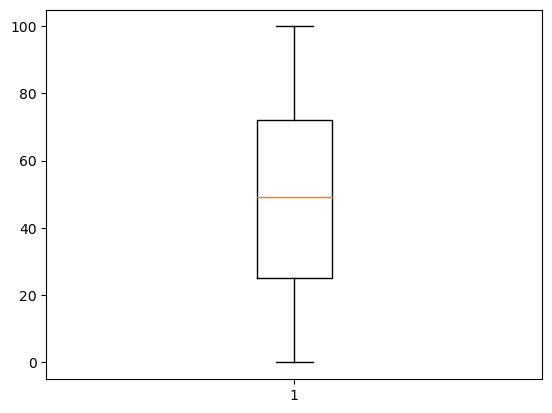

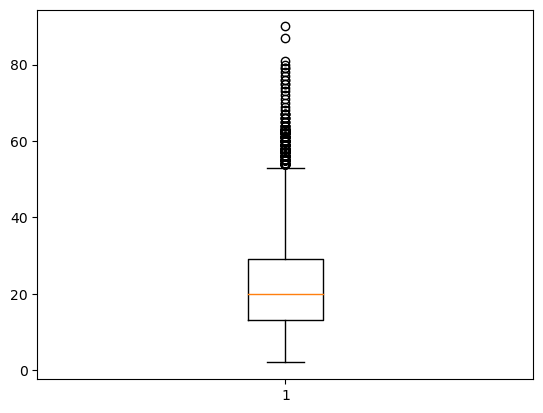

In [81]:
for i in cont_vars:
    plt.boxplot(data[i])
    plt.show()